In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, nbinom
import seaborn as sns
import pandas as pd

from Model_less_weird import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs

# Parameters and Initialization

In [2]:
# Parameters
N_inp = 2000
N_bar = 2000
num_states = 100
steps = 100
start_t = steps-25 # Start of time window

In [3]:
place_inputs = PlaceInputs(N_inp, num_states).get_inputs()
model = Model(
    N_inp, N_bar, num_states,
    steps=steps,
)

In [4]:
cache_states = [25, 75]
forget_state = 75

# Run Task (with learning)

Now I just cached at location: 25
Now I just cached at location: 75
Recall after cache at sites 25 and 75:


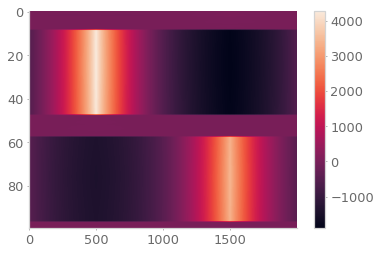

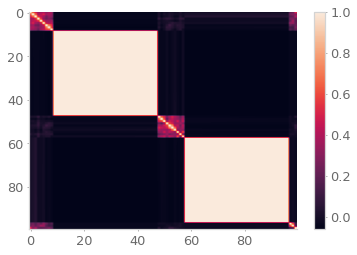

Recall after forgetting at site 75:


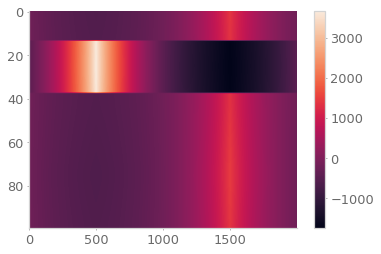

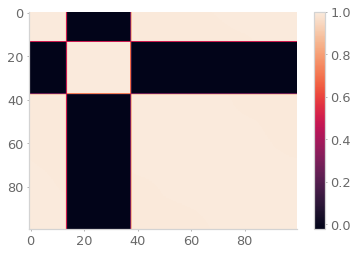

Recall after re-cache at site 75:


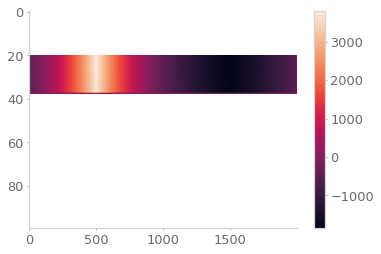

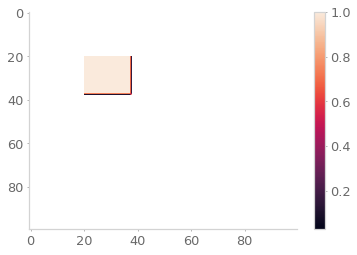

/var/folders/_c/yvfh0j710jqbx9659qpv7cww0000gn/T/ipykernel_5490/1739655992.py:49: RuntimeWarning: invalid value encountered in divide
  act_normalized = (acts[forget_state]>0) / np.linalg.norm(acts[forget_state]>0)


Recall after forgetting at site 75:


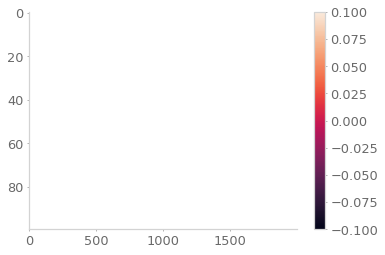

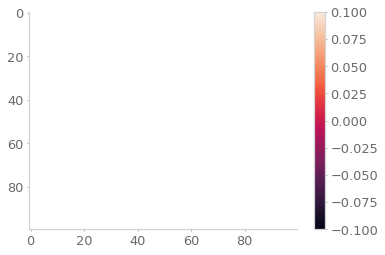

Recall after re-cache at site 75:


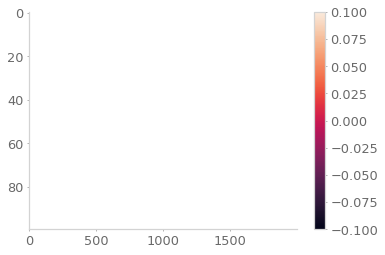

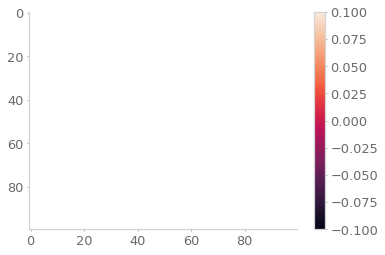

Recall after forgetting at site 75:


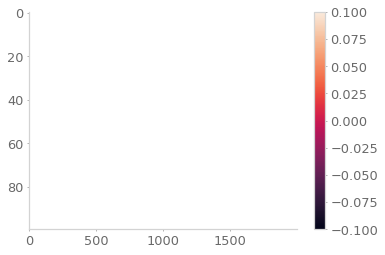

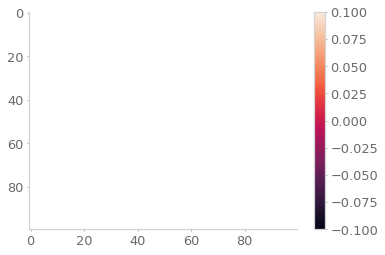

Recall after re-cache at site 75:


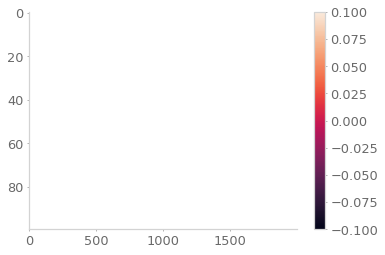

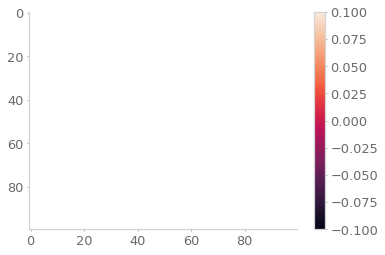

Recall after forgetting at site 75:


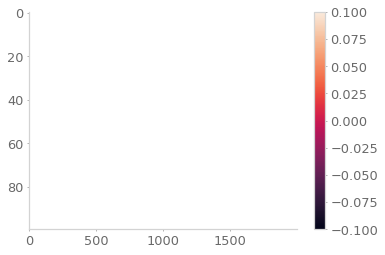

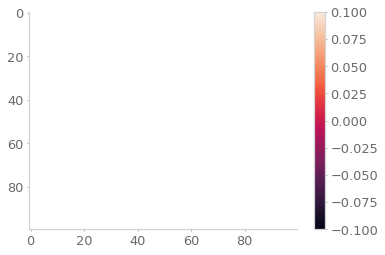

Recall after re-cache at site 75:


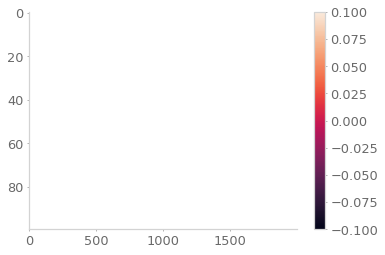

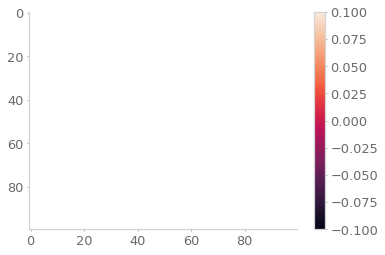

Recall after forgetting at site 75:


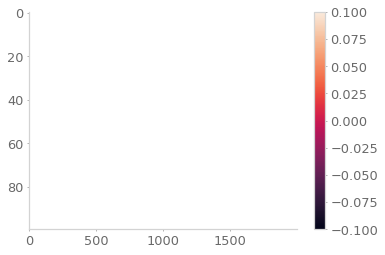

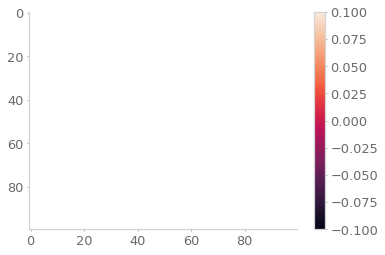

Recall after re-cache at site 75:


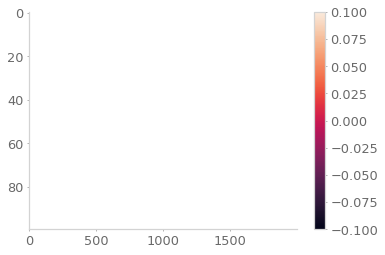

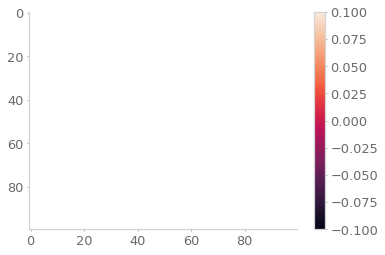

Recall after forgetting at site 75:


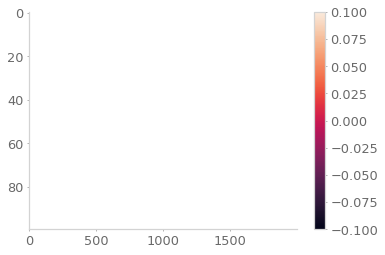

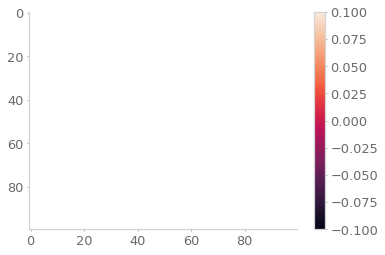

Recall after re-cache at site 75:


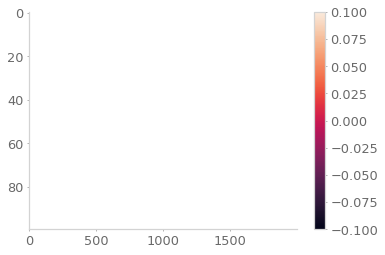

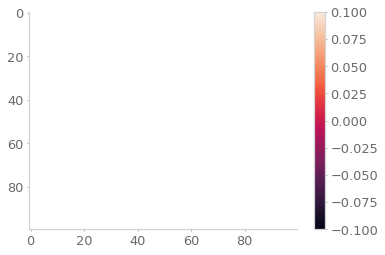

Recall after forgetting at site 75:


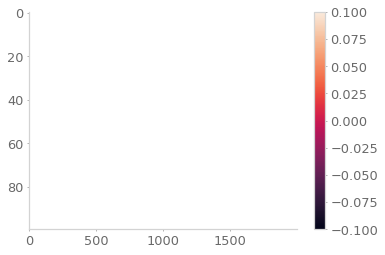

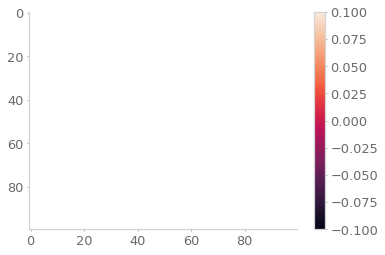

Recall after re-cache at site 75:


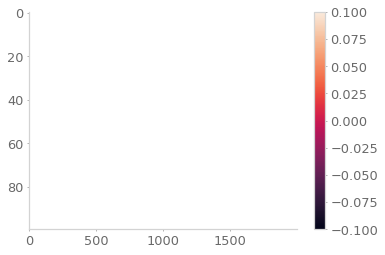

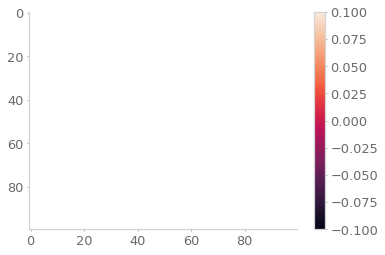

Recall after forgetting at site 75:


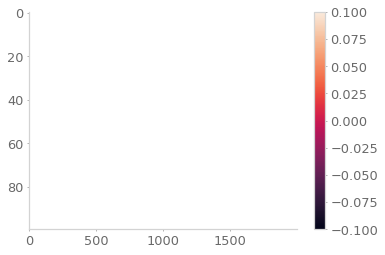

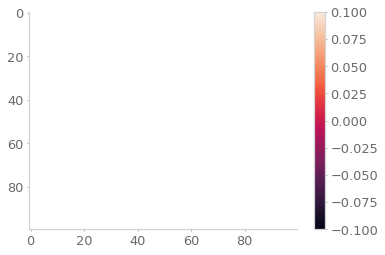

Recall after re-cache at site 75:


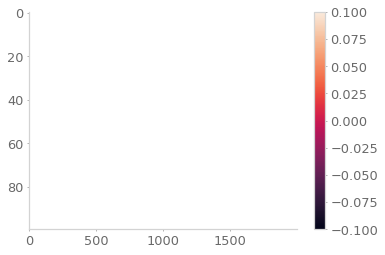

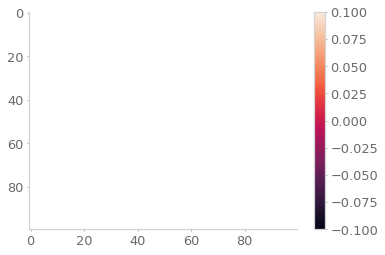

Recall after forgetting at site 75:


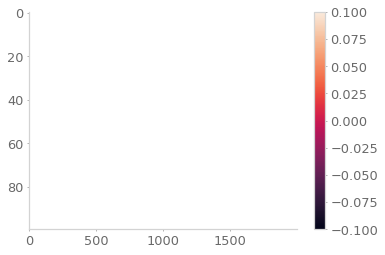

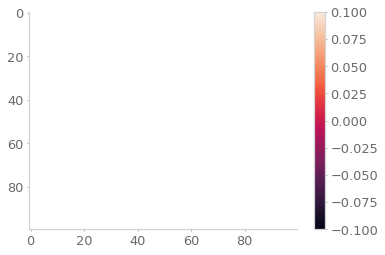

Recall after re-cache at site 75:


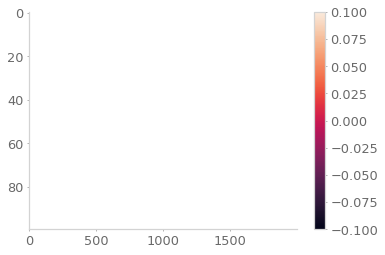

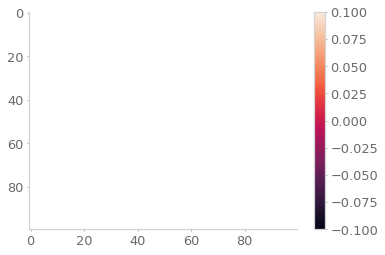

Recall after forgetting at site 75:


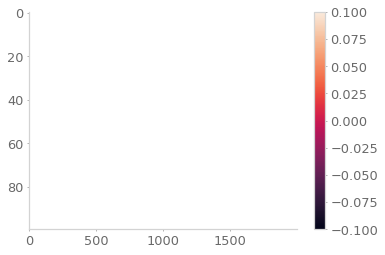

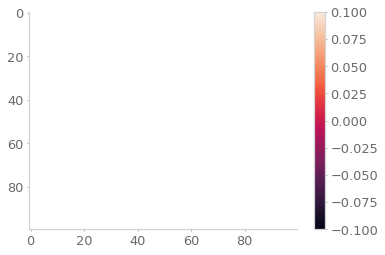

Recall after re-cache at site 75:


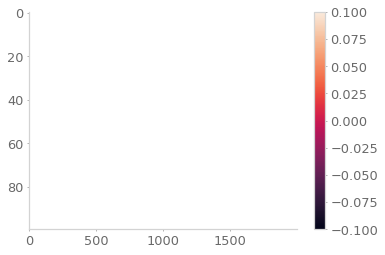

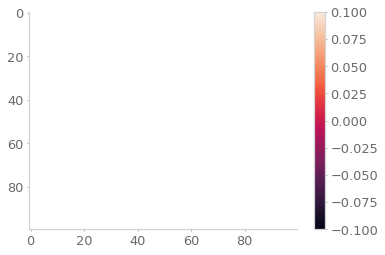

Recall after forgetting at site 75:


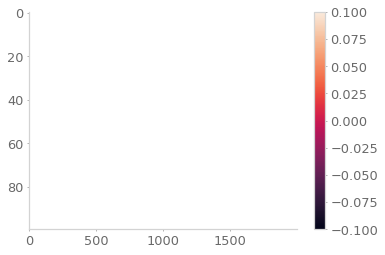

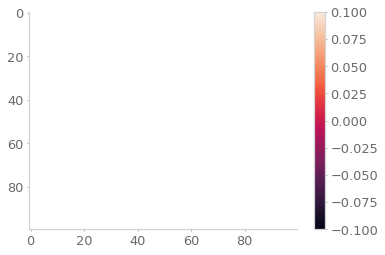

Recall after re-cache at site 75:


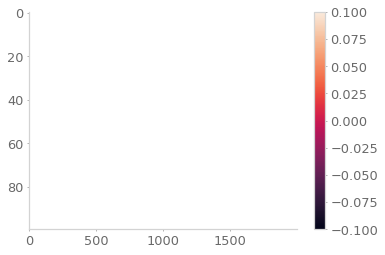

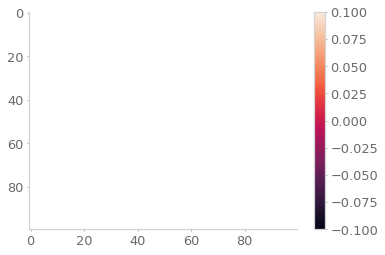

Recall after forgetting at site 75:


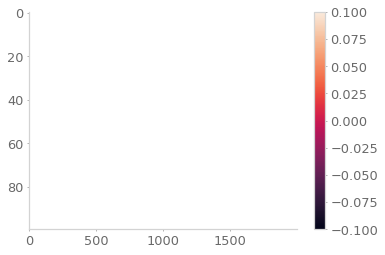

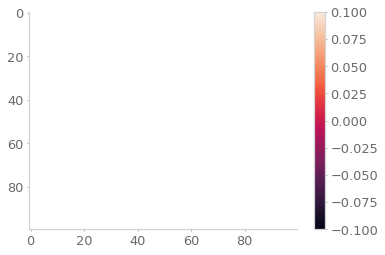

Recall after re-cache at site 75:


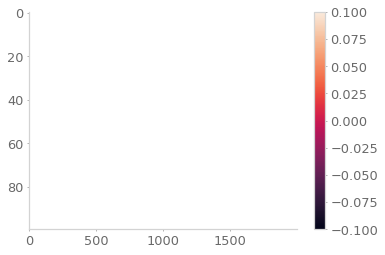

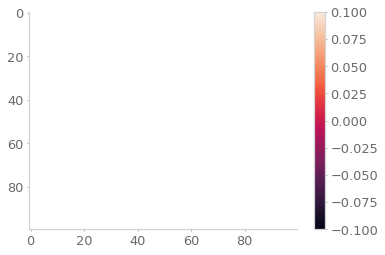

Recall after forgetting at site 75:


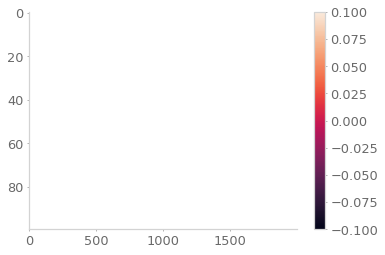

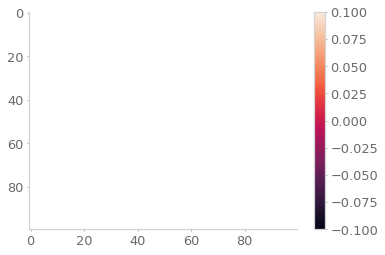

Recall after re-cache at site 75:


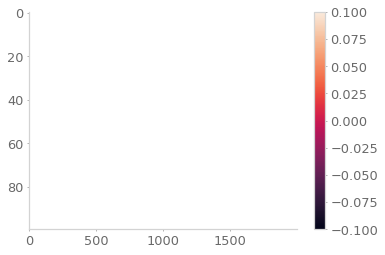

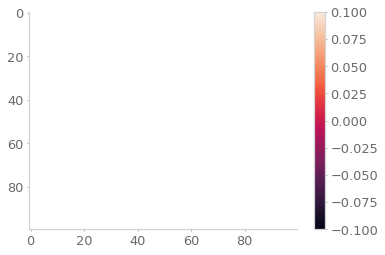

Recall after forgetting at site 75:


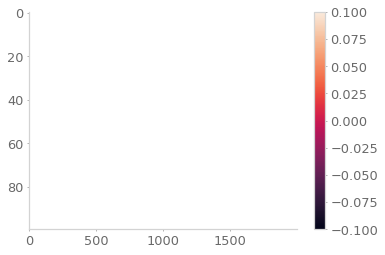

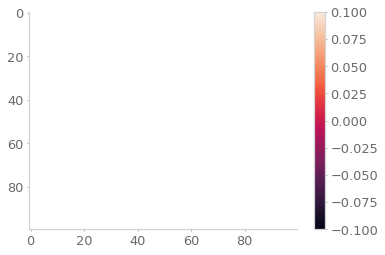

Recall after re-cache at site 75:


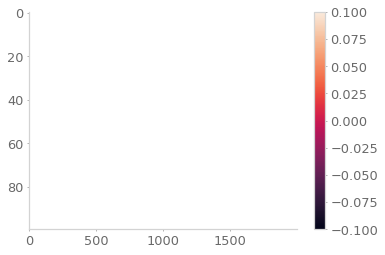

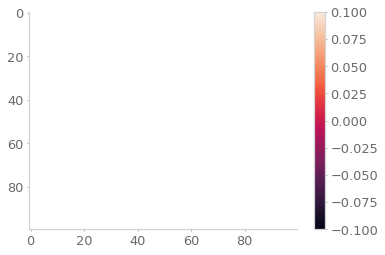

Recall after forgetting at site 75:


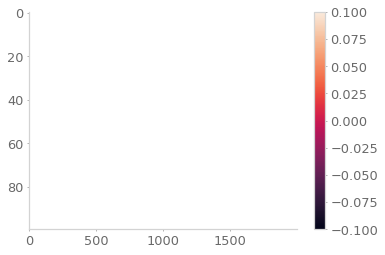

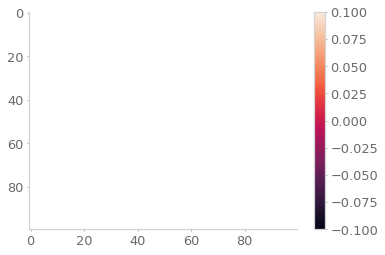

Recall after re-cache at site 75:


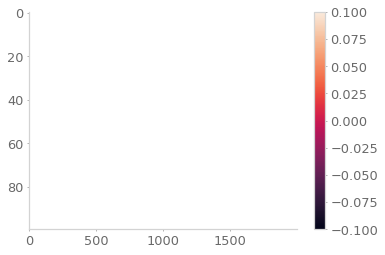

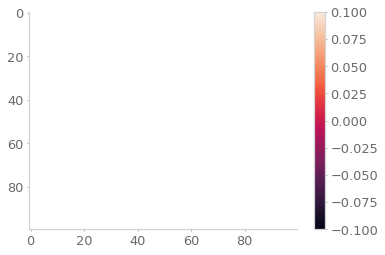

Recall after forgetting at site 75:


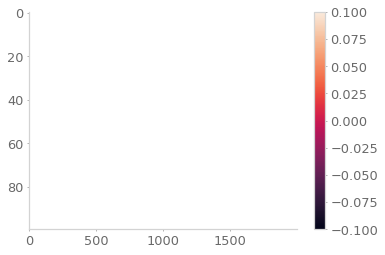

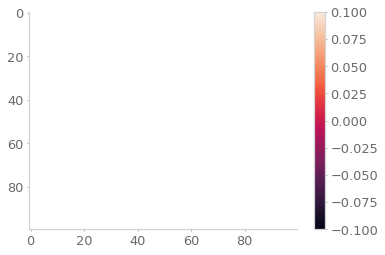

Recall after re-cache at site 75:


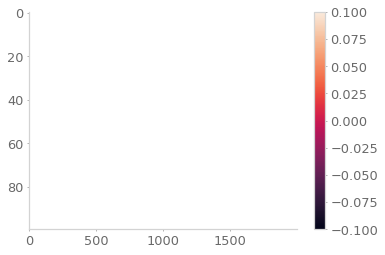

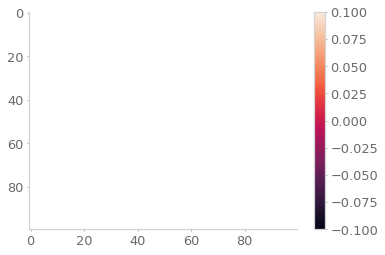

Recall after forgetting at site 75:


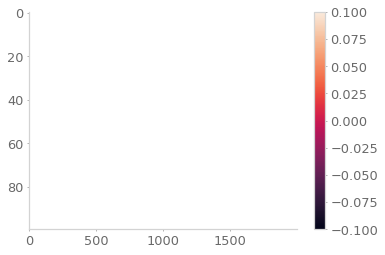

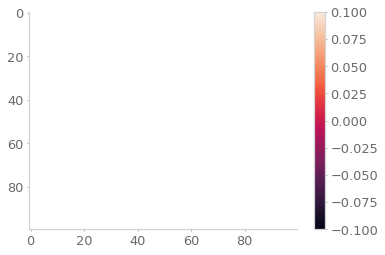

Recall after re-cache at site 75:


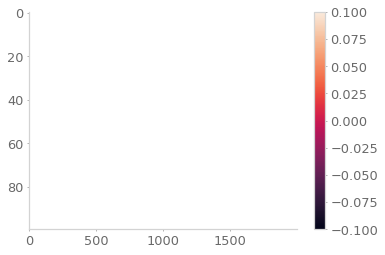

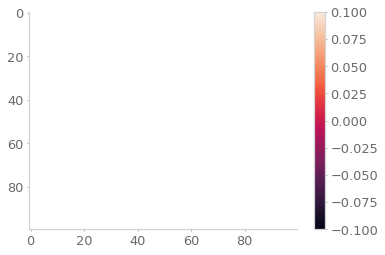

Recall after forgetting at site 75:


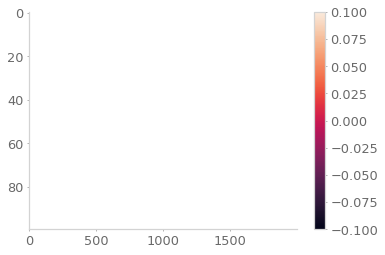

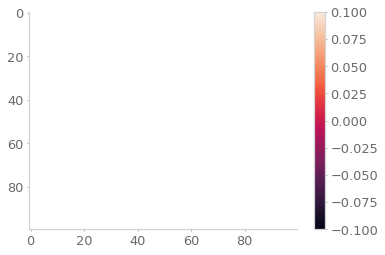

Recall after re-cache at site 75:


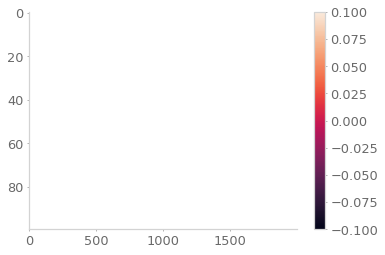

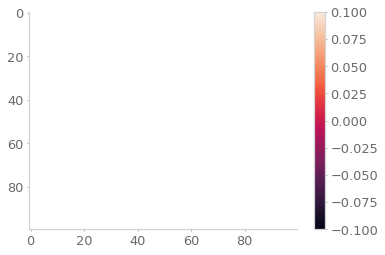

Recall after forgetting at site 75:


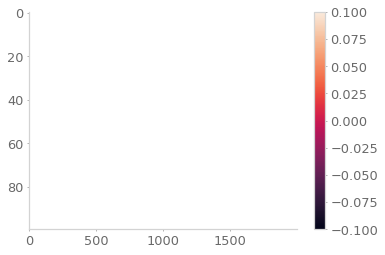

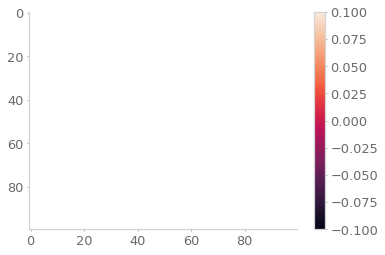

Recall after re-cache at site 75:


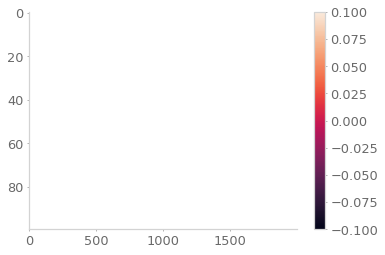

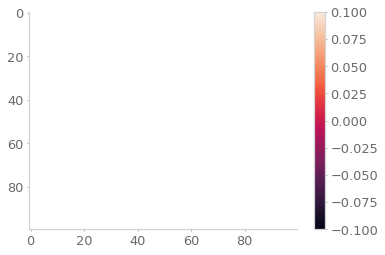

Recall after forgetting at site 75:


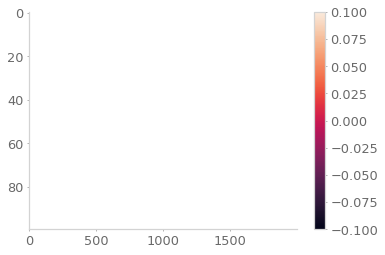

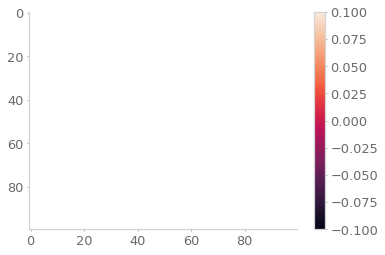

Recall after re-cache at site 75:


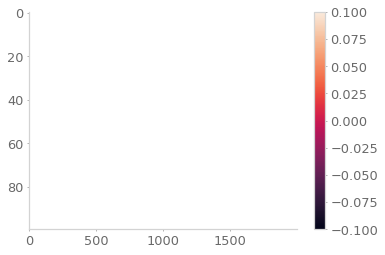

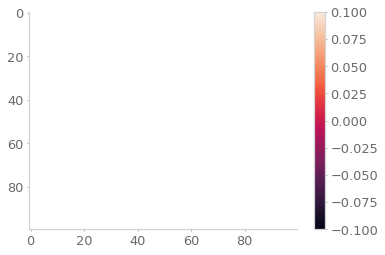

In [17]:
def get_avg_cache_acts(cache_acts_over_time):
    avg_cache_acts = []
    for i in range(len(cache_acts_over_time)):
        location = cache_states[i]
        vec = cache_acts_over_time[i][start_t:steps, location, :].mean(axis=0)
        avg_cache_acts.append(vec)
    avg_cache_acts = np.array(avg_cache_acts)
    return avg_cache_acts

def show_recall():
    _, recall_acts, recall_reconstruct, recall_acts_over_time = model.run_recall(
    1.0, place_inputs, n_zero_input=0)
    plt.figure()
    plt.imshow(recall_reconstruct, aspect='auto')
    plt.colorbar()
    plt.show()
    plt.imshow(np.corrcoef(recall_acts), aspect='auto')
    plt.colorbar()
    plt.show()
    
    
model.reset()
cache_acts = []
cache_acts_over_time = []
retrieval_acts = []
retrieval_acts_over_time = []
for cache_state in cache_states:
    print("Now I just cached at location:", cache_state)
    preacts, acts, _, acts_over_time = model.run_recurrent(place_inputs, n_zero_input=20)
    model.update(place_inputs[cache_state], acts[cache_state], preacts[cache_state])
    if cache_state == forget_state:
        cache_acts.append(acts_over_time[steps-1][forget_state].copy())
        cache_acts_over_time.append(acts_over_time[forget_state].copy())
    

print("Recall after cache at sites 25 and 75:")
show_recall()




num_repeats = 20

for r in range(num_repeats):
    
    #'''
    preacts, acts, _, acts_over_time = model.run_recurrent(place_inputs, n_zero_input=20)
    #act_normalized = acts_over_time[steps-1][forget_state] / np.linalg.norm(acts_over_time[steps-1][forget_state])
    act_normalized = (acts[forget_state]>0) / np.linalg.norm(acts[forget_state]>0)

    model.J_xy -= np.dot(model.J_xy, act_normalized)[:, None] * act_normalized[None, :]
    change = model.J_xx - model.J_xx_orig
    change -= np.dot(model.J_xx, act_normalized)[:, None] * act_normalized[None, :]
    #change += 0.0001*np.matmul(np.ones_like(acts_over_time[steps-1][forget_state].transpose())*model.plasticity_bias, acts_over_time[steps-1][forget_state])
    #change -= np.dot(act_normalized, model.J_xx)[None, :] * act_normalized[:, None]
    model.J_xx = model.J_xx_orig + change
    
    
    #model.reverse_update(place_inputs[forget_state], acts[forget_state], preacts[forget_state], forget_lr_multiplier=0.5)
    retrieval_acts.append(acts_over_time[steps-1][forget_state].copy())
    retrieval_acts_over_time.append(acts_over_time[forget_state].copy())
    
    print("Recall after forgetting at site 75:")
    show_recall()
    #'''
    
    preacts, acts, _, acts_over_time = model.run_recurrent(place_inputs, n_zero_input=20)
    model.update(place_inputs[forget_state], acts_over_time[steps-1][forget_state], preacts[forget_state])
    cache_acts.append(acts_over_time[steps-1][forget_state].copy())
    cache_acts_over_time.append(acts_over_time[forget_state].copy())
    print("Recall after re-cache at site 75:")
    
    show_recall()

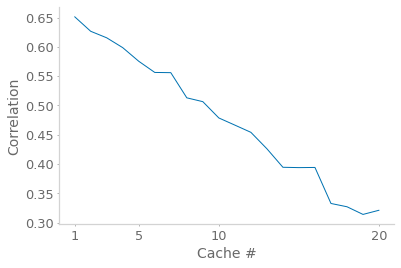

In [101]:
def cross_corr_from_pairwise(pairwise):
    results = []
    for i in range(1, len(pairwise)):
        results.append(np.diagonal(pairwise, offset=i).mean())
    return results

plt.plot(range(1, len(cache_acts)), cross_corr_from_pairwise(np.corrcoef(np.concatenate([cache_acts], axis=0))))
plt.xticks([1, 5, 10, 20])
plt.xlabel("Cache #")
plt.ylabel("Correlation")
plt.show()

In [95]:
for i in range(10):
    print(np.sum(cache_acts[i]))
    print(np.sum(retrieval_acts[i]))
    print('***')

137.2432592293191
878.6100861245787
***
181.67400396531966
933.1561224048819
***
183.25516593941046
943.3462262791686
***
183.74401072079982
973.5783349206405
***
170.20752534444495
806.1744692898984
***
181.34552936723088
992.9601611828163
***


IndexError: list index out of range

In [14]:
for i in range(5):
    print(np.corrcoef(cache_acts[i], retrieval_acts[i])[0, 1])
    #print(np.corrcoef(cache_acts[i+1], retrieval_acts[i])[0, 1])
    print('**')

0.559309629036474
**
0.9950118824441876
**
0.9967817190893957
**
0.9968994886179621
**
0.9965991540072544
**


In [24]:
model.J_xy.shape

(2000, 2000)

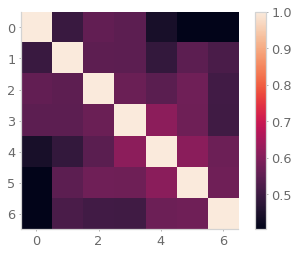

In [11]:
plt.imshow(np.corrcoef(np.concatenate([cache_acts], axis=0)))
plt.colorbar()
plt.show()